<a href="https://colab.research.google.com/github/strawndri/time-series/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extras

## Time Series é uma coleção de dados que segue uma ordem cronológica, um **tempo sequencial**. O período que é representado pode ser em segundos, minutos, horas, dias, meses, anos, etc.

> **Conteúdo da Alura**:
- Crescimento proporcional entre linhas (time series) utilizando pandas: 
https://www.alura.com.br/artigos/crescimento-proporcional-entre-linhas-time-series-utilizando-pandas

In [1]:
def plotar(title, xlabel, ylabel, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(title, fontsize=18, loc='left')
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel, fontsize=14)
  ax = ax

In [2]:
def compararPlots(title, x, y1, y2, y3, dataset):
  plt.figure(figsize=(16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(title, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

# Importando Bibliotecas

In [3]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

!pip install seaborn
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# Alucar - Análise de Vendas

## Importando a Base de Dados

In [4]:
url = ('https://raw.githubusercontent.com/strawndri/time-series/main/Data/alucar.csv')
alucar = pd.read_csv(url)
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## Analisando o tamanho da base de dados

In [5]:
print(f'A quantidade de linhas e colunas é: {alucar.shape}')

A quantidade de linhas e colunas é: (24, 2)


## Analisando se há valores nulos

In [6]:
# use .sum() duas vezes para somar as duas colunas  
valores_nulos = alucar.isna().sum().sum()
print(f'Quantidade de valores nulos: {valores_nulos}')

Quantidade de valores nulos: 0


## Tipos dos dados

In [7]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
# transformando os valores do "mês" em datas
alucar['mes'] = pd.to_datetime(alucar['mes'])

## Gráfico das Vendas

Há algumas padronizações a serem utilizadas quando estamos trabalhando com gráficos (Data Visualization).

Para mais informações, acesse: *https://urbaninstitute.github.io/graphics-styleguide/*

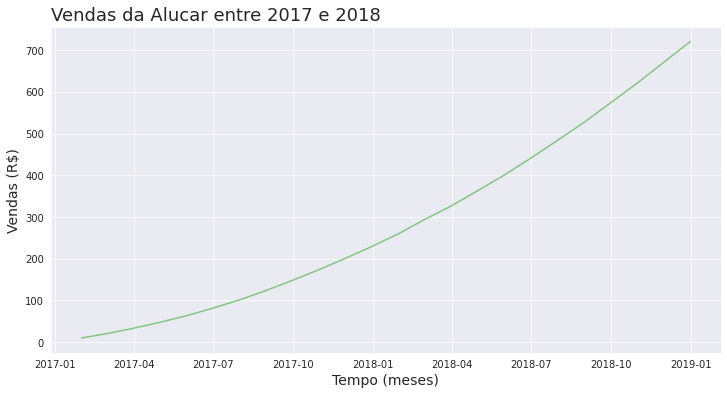

In [10]:
plotar('Vendas da Alucar entre 2017 e 2018', 'Tempo (meses)', 
       'Vendas (R$)', 'mes', 'vendas', alucar)

## Aumento das Vendas

In [11]:
alucar['aumento'] = alucar[['vendas']].diff()

In [12]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


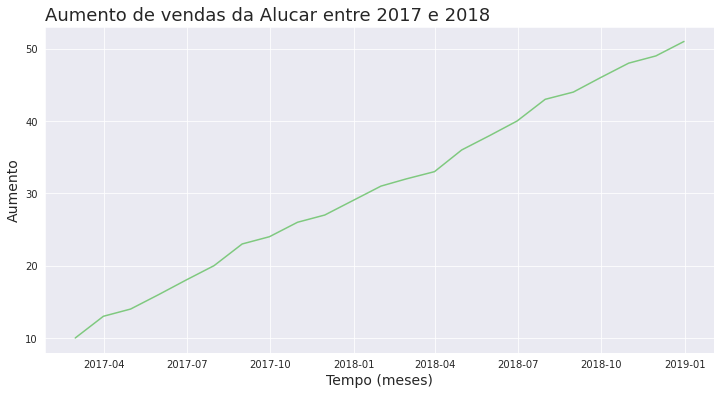

In [13]:
plotar('Aumento de vendas da Alucar entre 2017 e 2018', 'Tempo (meses)', 
       'Aumento', 'mes', 'aumento', alucar)

## Aceleração do Aumento das Vendas

In [14]:
alucar['aceleracao'] = alucar[['aumento']].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


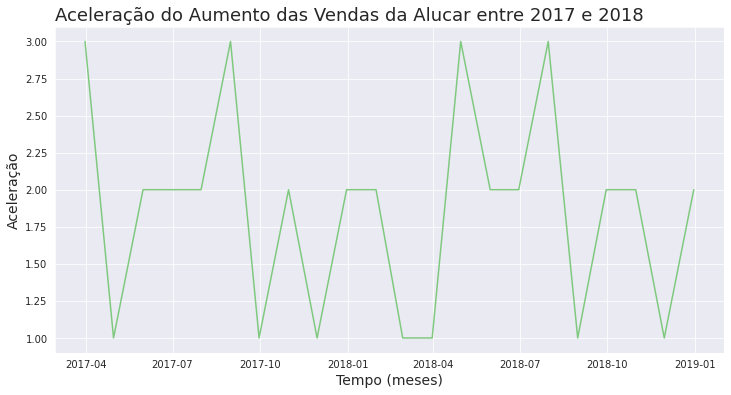

In [15]:
plotar('Aceleração do Aumento das Vendas da Alucar entre 2017 e 2018', 'Tempo (meses)', 
       'Aceleração', 'mes', 'aceleracao', alucar)

## Comparação de Resultados

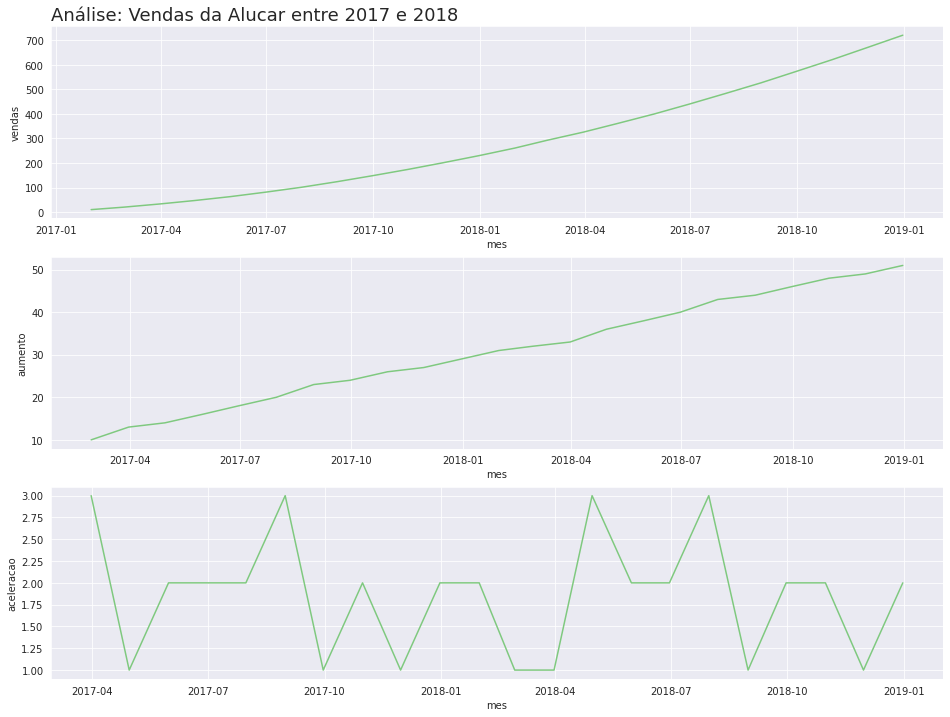

In [16]:
compararPlots('Análise: Vendas da Alucar entre 2017 e 2018', 'mes', 'vendas', 'aumento', 'aceleracao', alucar)

## Autocorrelação

**AutoCorrelação** refere-se a uma correlação de determinados valores, os quais estão ordenados conforme um tempo 

**Para saber mais, acesse:** https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o

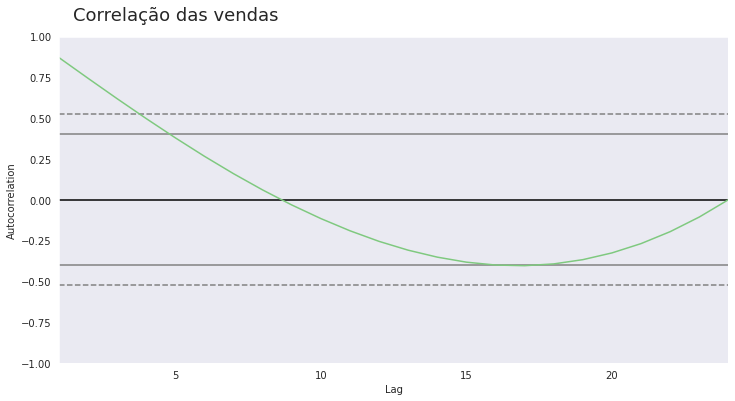

In [17]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

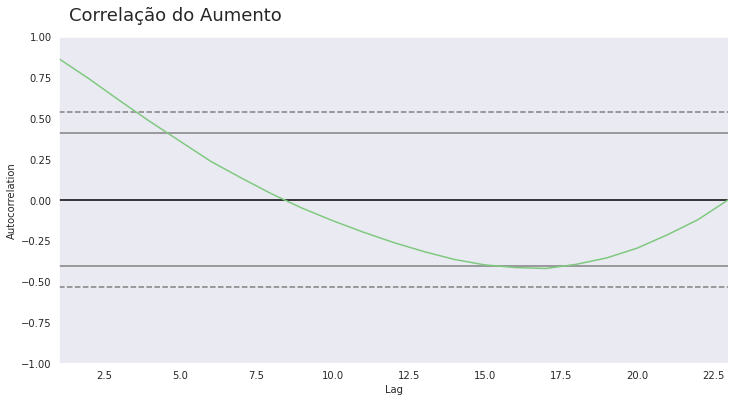

In [18]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

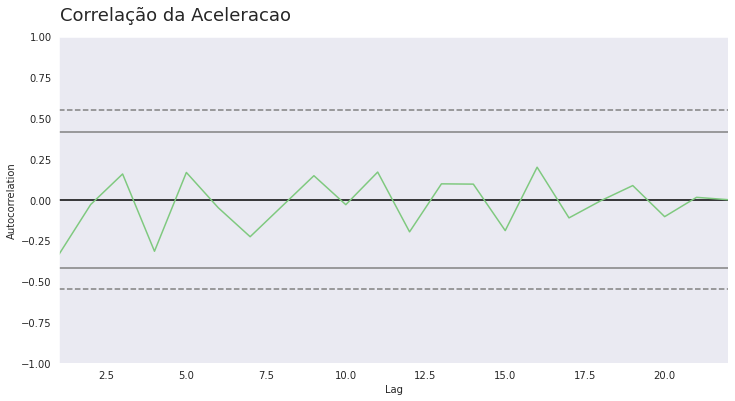

In [19]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleracao', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando a Newsletter Mensal

In [22]:
url = 'https://raw.githubusercontent.com/strawndri/time-series/main/Data/newsletter_alucar.csv'
assinantes = pd.read_csv(url)
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [23]:
print(f'A quantidade de colunas e linhas é: {assinantes.shape}')
print(f'A quantidade de dados nulos é: {assinantes.isna().sum().sum()}')

A quantidade de colunas e linhas é: (24, 2)
A quantidade de dados nulos é: 0


## Tipo dos dados

In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [32]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

## Aumento de assinantes

In [37]:
assinantes['aumento'] = assinantes['assinantes'].diff()

## Aceleração do aumento

In [38]:
assinantes['aceleracao'] = assinantes['aumento'].diff()

## Resultado - Comparando valores - Newsletter

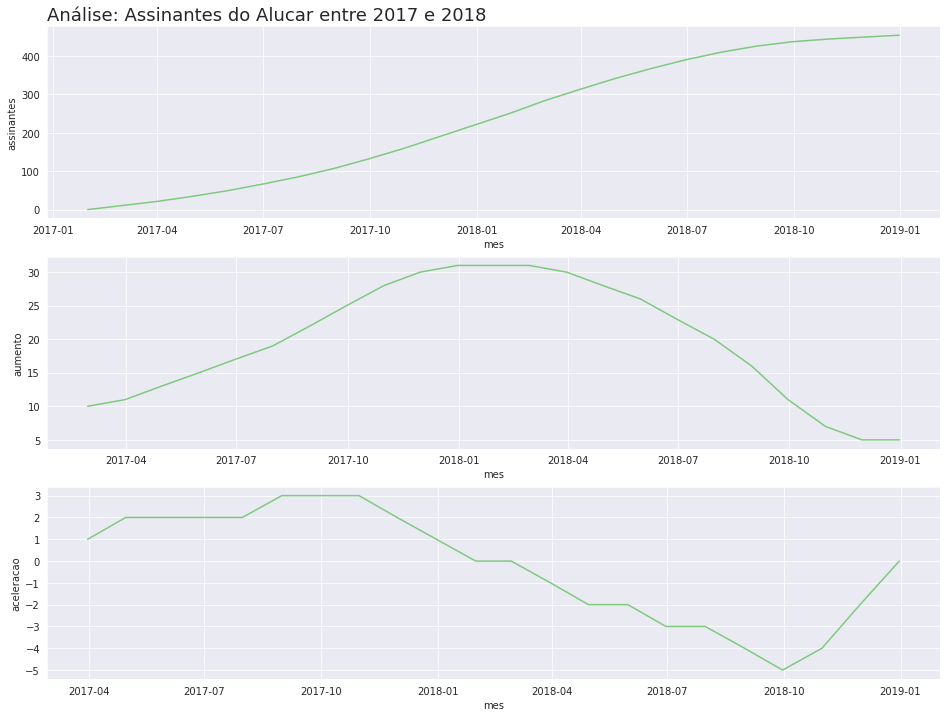

In [39]:
compararPlots('Análise: Assinantes do Alucar entre 2017 e 2018', 'mes', 'assinantes', 'aumento', 'aceleracao', assinantes)